In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [85]:
# Category 0
df0 =pd.read_csv(r'/gdrive/Shareddrives/FYP Project/Dataset_October25_Clustering/FoodData_group0.csv')
# Category 1
df1 =pd.read_csv(r'/gdrive/Shareddrives/FYP Project/Dataset_October25_Clustering/FoodData_group1.csv')
# Category 2
df2 =pd.read_csv(r'/gdrive/Shareddrives/FYP Project/Dataset_October25_Clustering/FoodData_group2.csv')
# Category 3
df3 =pd.read_csv(r'/gdrive/Shareddrives/FYP Project/Dataset_October25_Clustering/FoodData_group3.csv')


In [4]:
# Select diary group
diary_0 = df0.loc[df0['Group']=="diary"]
diary_1 = df1.loc[df1['Group']=="diary"]

In [5]:
diary_0_mean= diary_0.drop(["Unnamed: 0", "Name"], axis=1).mean()
diary_1_mean = diary_1.drop(["Unnamed: 0", "Name"], axis=1).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [6]:
mean_df = pd.concat([diary_0_mean, diary_1_mean], axis=1)

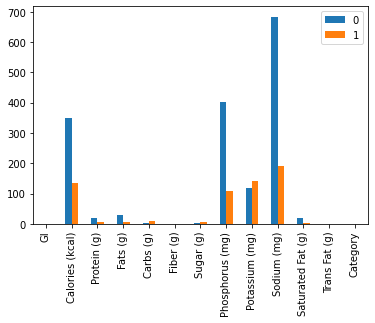

In [7]:
mean_df.plot(kind="bar")

In [35]:
def plotDifference(data1, data2, sub_category):
  if sub_category not in data1["Group"].unique():
    print(f"{sub_category} not in data set1")
    return None
  if sub_category not in data2["Group"].unique():
    print(f"{sub_category} not in data set2")
    return None
  
  # Select sub category
  group_0 = data1.loc[data1['Group']==sub_category]
  group_1 = data2.loc[data2['Group']==sub_category]

  # Take mean of each group
  group_0_mean= group_0.drop(["Unnamed: 0", "Name"], axis=1).mean()
  group_1_mean = group_1.drop(["Unnamed: 0", "Name"], axis=1).mean()

  # plot in bar chart
  mean_df = pd.concat([group_0_mean, group_1_mean ], axis=1)

  mean_df.plot(kind="bar")
  plt.legend(mean_df.iloc[-1])




In [67]:
def getMean(data, sub_category):
  if sub_category not in data["Group"].unique():
    print(f"{sub_category} not in data set {data['Category'].unique()}")
    return None

  group_0= data.loc[data['Group']==sub_category]
  return group_0.drop(["Unnamed: 0", "Name"], axis=1).mean()

  
def plotDifferenceAll(data1, data2, data3, data4, sub_category):
  concat_list = []
  for data in [data1, data2, data3, data4]:
    mean = getMean(data, sub_category)

    if type(mean) is pd.Series:
      concat_list.append(mean)
      

  # plot in bar chart
  mean_df = pd.concat(concat_list, axis=1)
  mean_df.plot(kind="bar")
  plt.legend(mean_df.iloc[-1])
  plt.title(f"Comparison of the mean values of {sub_category} in All Categories")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


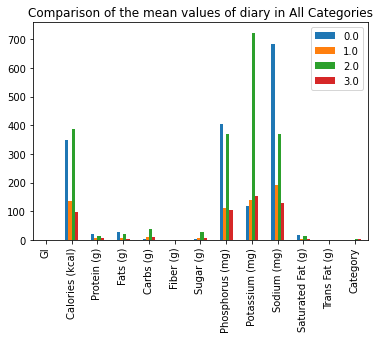

In [68]:
plotDifferenceAll(df0, df1, df2, df3, "diary")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


beverages not in data set [2]
fast-foods not in data set [2]
seafood not in data set [2]


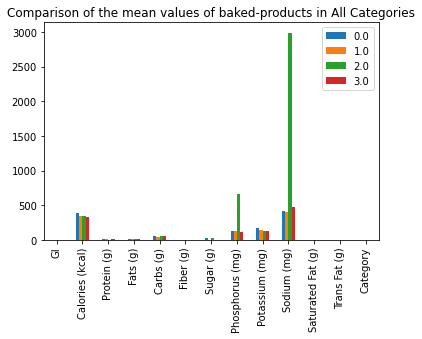

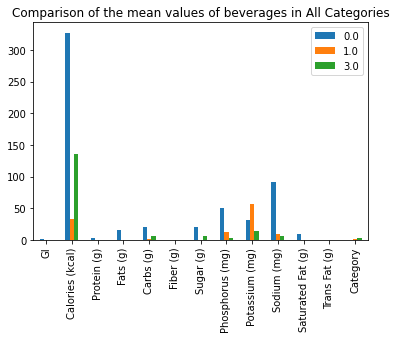

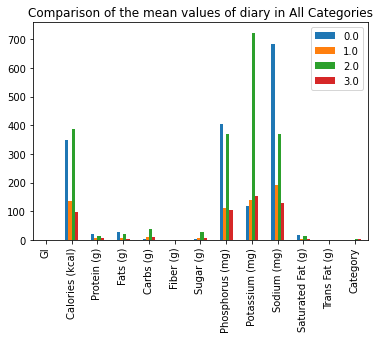

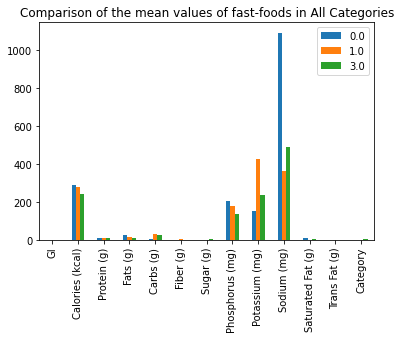

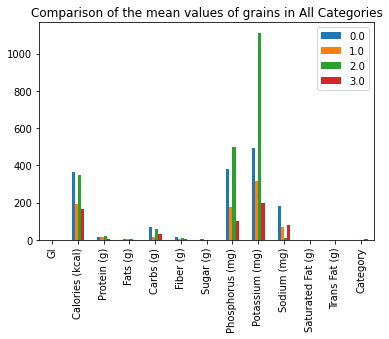

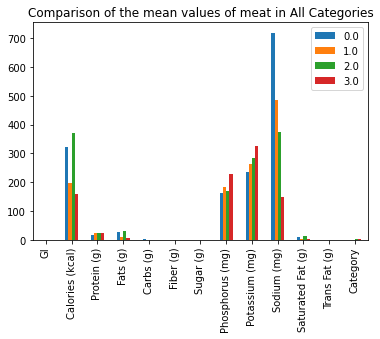

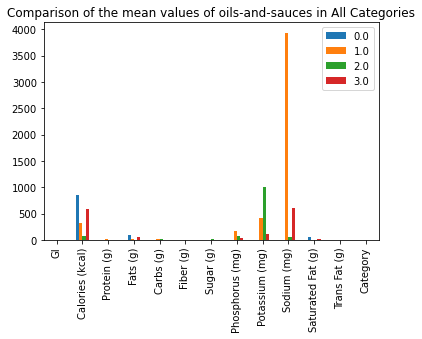

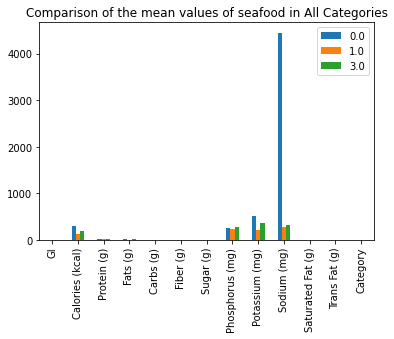

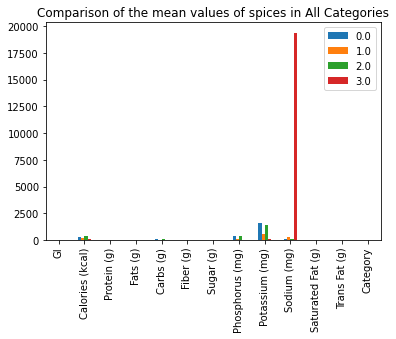

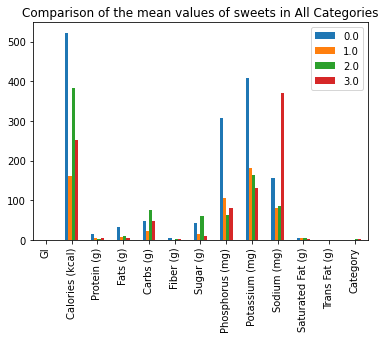

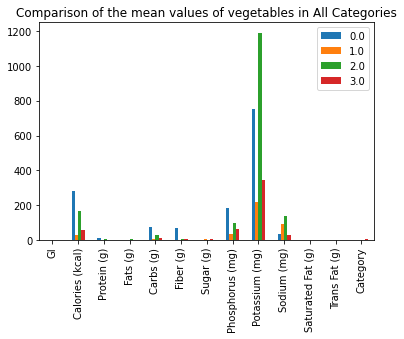

In [70]:
for g in df0["Group"].unique():
  plotDifferenceAll(df0, df1, df2, df3, g)

In [88]:
def getStandardizeMean(data, sub_category):
  if sub_category not in data["Group"].unique():
    print(f"{sub_category} not in data set {data['Category'].unique()}")
    return None

  numeric = data.select_dtypes(include=np.number)
  numeric = numeric.drop(['Category'], axis=1)
  numeric_columns = numeric.columns

  data[numeric_columns] = (numeric - numeric.mean())/numeric.std()

  group_0= data.loc[data['Group']==sub_category]
  return group_0.drop(["Unnamed: 0", "Name"], axis=1).mean()

  
def plotDifferenceAll(data1, data2, data3, data4, sub_category):
  concat_list = []
  for data in [data1, data2, data3, data4]:
    mean = getStandardizeMean(data, sub_category)

    if type(mean) is pd.Series:
      concat_list.append(mean)
      

  # plot in bar chart
  mean_df = pd.concat(concat_list, axis=1)
  mean_df.plot(kind="bar")
  plt.legend(mean_df.iloc[-1])
  plt.title(f"Comparison of the mean values of {sub_category} in All Categories")
  plt.xlabel('Nutrients')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  del sys.path[0]


beverages not in data set [2]
fast-foods not in data set [2]
seafood not in data set [2]


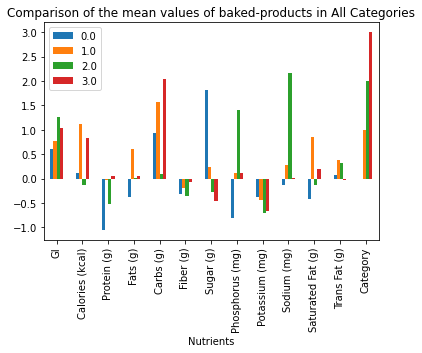

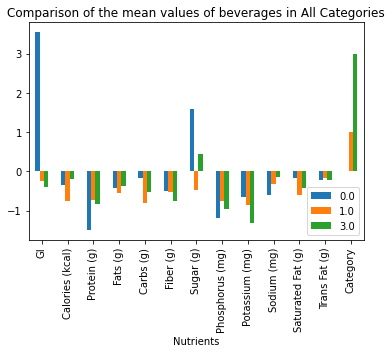

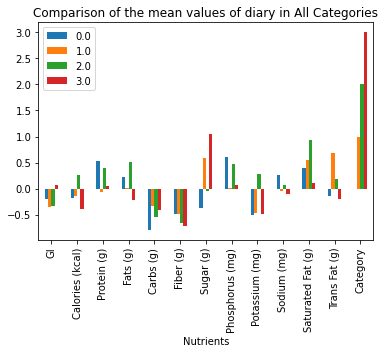

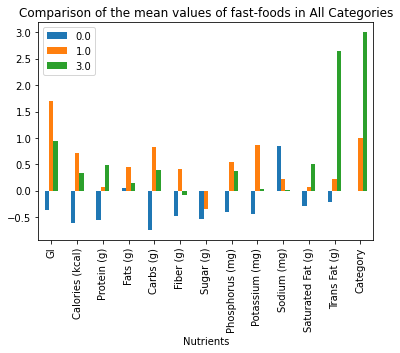

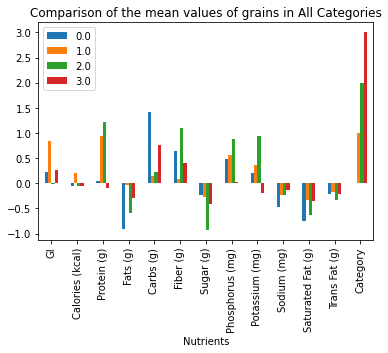

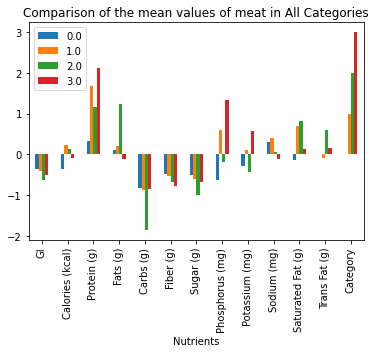

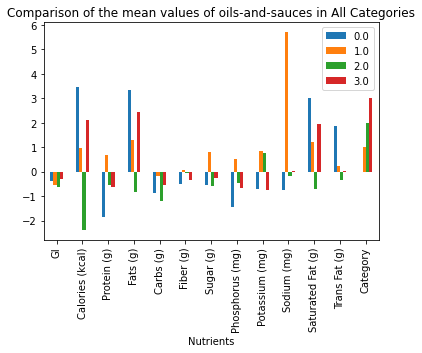

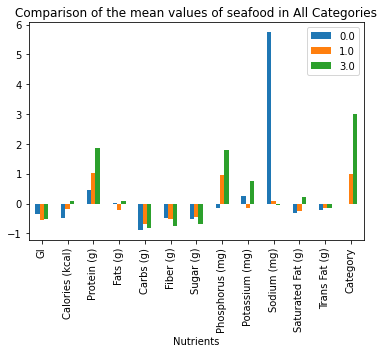

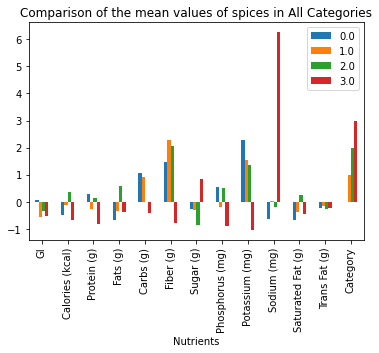

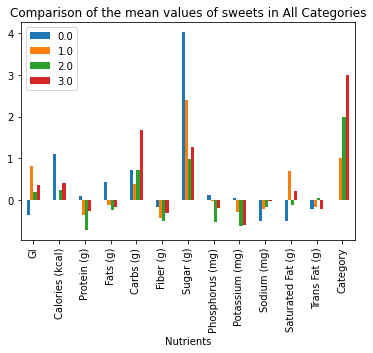

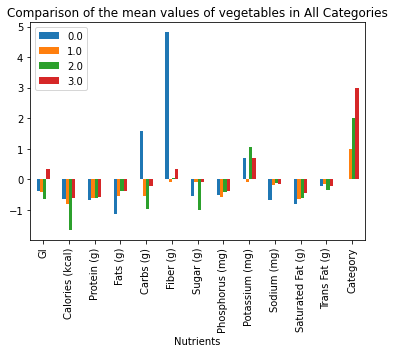

In [89]:
for g in df0["Group"].unique():

  plotDifferenceAll(df0, df1, df2, df3, g)